In [1]:
from pyissues import io as io_
from pyissues import analysis as an
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import lines
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
issues = io_.xmlloadCompressed(r'C:\Users\huang\OneDrive - mails.tsinghua.edu.cn\文档\上课\大三下学期\Python\issues.xml.gz')

In [3]:
data = pd.DataFrame(an.make_table(issues, time_unit="minute"))
data['created'] = pd.to_datetime(data['created'])
data['last_changed'] = pd.to_datetime(data['last_changed'])

In [4]:
data.describe()

,type,assigned_to,priority,superseder,dependencies,title,last_changed,last_changed_by,created_by,stage,created,status,_id,resolution,versions,components,nosy_list,keywords
count,32084,16973,41980,2809,748,42128,34850,34850,34850,29738,34850,42128,42128,34159,39718,37640,42059,21167
unique,7,167,6,2152,685,41855,33563,2605,11612,6,34646,4,42128,12,231,531,37396,84
top,behavior,docs@python,normal,Misspelled actually\n \n\nView:\n 11515,21833,Spam,2017-03-31 16:36:00,vstinner,vstinner,resolved,2014-02-07 20:25:00,closed,19216,fixed,(Python 2.7),(Library (Lib)),(vstinner),(patch)
freq,16480,4317,38264,33,16,49,222,2906,1928,24571,4,34850,1,18683,3097,9844,209,17514
first,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-24 17:20:00,NaN,NaN,NaN,2007-08-23 19:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-05 02:34:00,NaN,NaN,NaN,2021-03-04 18:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The start time and last changed time distribution

ipykernel_launcher:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


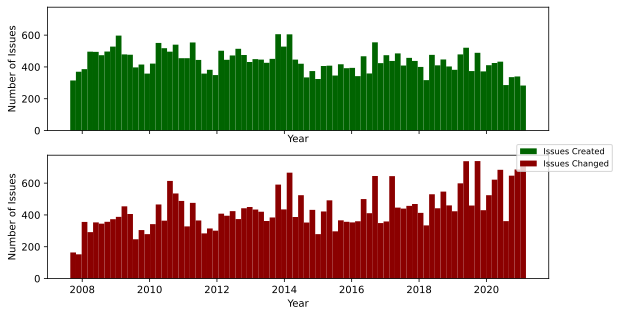

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,5), sharex=True, sharey=True)
for i in ax:
    i.set_xlabel("Year")
    i.set_ylabel("Number of Issues")
ax[0].hist(list(filter(lambda _: not pd.isna(_), data['created'])), color="darkgreen", bins=80, label="Issues Created")
ax[1].hist(list(filter(lambda _: not pd.isna(_), data['last_changed'])), color="darkred", bins=80, label="Issues Changed")
fig.legend(loc=5, fontsize="small")
fig.show()

Distribution of an issue's last time

In [6]:
pd.unique(data['resolution'])

array(['rejected', 'fixed', 'out of date', 'postponed', 'accepted',
       'not a bug', 'wont fix', 'duplicate', None, 'works for me',
       'later', 'remind', 'third party'], dtype=object)

In [7]:
resolutions = data.groupby(by='resolution').count()['_id']

ipykernel_launcher:5: UserWarning: FixedFormatter should only be used together with FixedLocator
ipykernel_launcher:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


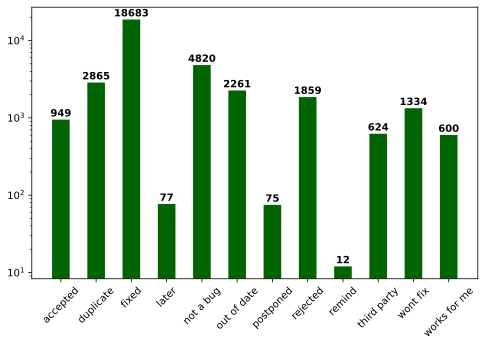

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
rects = ax.bar(height=resolutions, x=resolutions.index, color="darkgreen", width=0.5)
for rect in rects:
    ax.text(x=rect.get_x() + rect.get_width() / 2, y=rect.get_height() * 1.1, s=str(rect.get_height()), ha="center", weight="bold")
ax.set_xticklabels(labels=resolutions.index, rotation=45)
ax.set_yscale("log")
fig.show()

In [30]:
from collections import Counter
keywords = []
for _ in data['components'].dropna():
    keywords.extend(_)

counter = Counter(keywords)
x, y = zip(*counter.most_common())
print(counter)

Counter({'Library (Lib)': 11890, 'Documentation': 6738, 'Interpreter Core': 5089, 'Tests': 3211, 'Windows': 2677, 'Extension Modules': 2166, 'Build': 1685, 'IDLE': 1206, 'asyncio': 901, 'macOS': 837, 'Distutils': 775, 'Unicode': 760, 'IO': 617, 'Installation': 608, 'Tkinter': 549, 'ctypes': 459, 'email': 413, 'Regular Expressions': 369, '2to3 (2.x to 3.x conversion tool)': 335, 'XML': 324, 'Demos and Tools': 321, 'None': 320, 'Distutils2': 285, 'SSL': 279, 'C API': 203, 'Cross-Build': 155, 'Devguide': 150, 'Argument Clinic': 119, 'Documentation tools (Sphinx)': 73, 'Subinterpreters': 55, 'Benchmarks': 51, 'FreeBSD': 31})


ipykernel_launcher:5: UserWarning: FixedFormatter should only be used together with FixedLocator
ipykernel_launcher:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


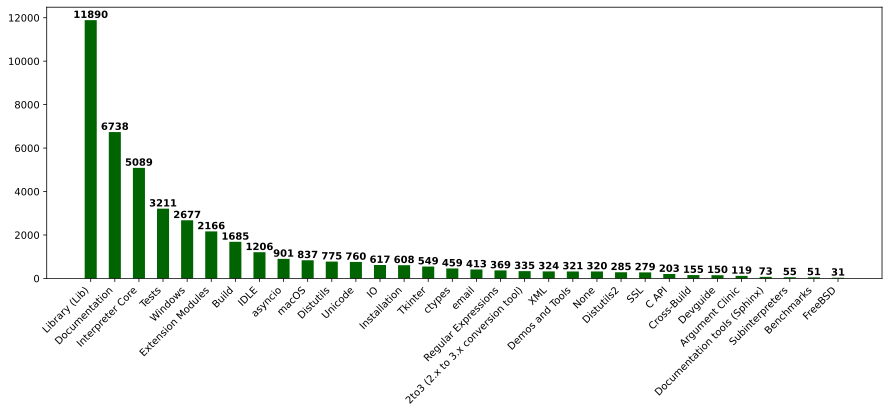

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
rects = ax.bar(x=x, height=y, color="darkgreen", width=0.5)
for rect in rects:
    ax.text(x=rect.get_x() + rect.get_width() / 2, y=rect.get_height() + 100, s=str(rect.get_height()), ha="center", weight="bold")
ax.set_xticklabels(labels=x, rotation=45, ha="right")
# ax.set_yscale("log")
fig.show()

In [32]:
versions = []
for _ in data['versions'].dropna():
    versions.extend(_)

counter = Counter(versions)
x, y = zip(*counter.most_common())
print(counter)

Counter({'Python 2.7': 10065, 'Python 3.7': 7476, 'Python 3.6': 7084, 'Python 3.8': 6531, 'Python 3.5': 6473, 'Python 3.4': 6373, 'Python 3.3': 5462, 'Python 3.2': 4949, 'Python 3.9': 4078, 'Python 2.6': 3085, 'Python 3.1': 2661, 'Python 3.10': 2272, 'Python 3.0': 1847, 'Python 2.5': 1091, '3rd party': 225, 'Python 2.4': 188, 'Python 2.5.3': 44, 'Python 2.3': 35, 'Python 2.2.3': 17, 'Python 2.2.1': 16, 'Python 2.2.2': 16, 'Python 2.2': 16, 'Python 2.1.2': 13, 'Python 2.1.1': 13})


ipykernel_launcher:5: UserWarning: FixedFormatter should only be used together with FixedLocator
ipykernel_launcher:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


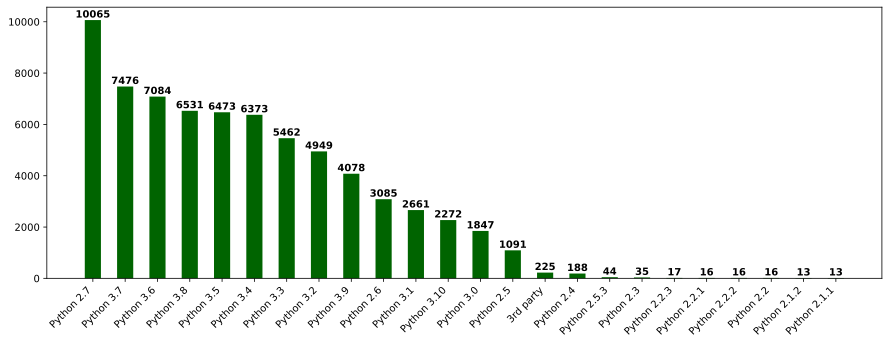

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
rects = ax.bar(x=x, height=y, color="darkgreen", width=0.5)
for rect in rects:
    ax.text(x=rect.get_x() + rect.get_width() / 2, y=rect.get_height() + 100, s=str(rect.get_height()), ha="center", weight="bold")
ax.set_xticklabels(labels=x, rotation=45, ha="right")
# ax.set_yscale("log")
fig.show()

In [76]:
from functools import reduce
import operator
py_3_check = lambda _: "Python 3" in _
py_2_check = lambda _: "Python 2" in _
with_versions = data.dropna(subset=["versions"])
py_2 = [reduce(operator.or_, map(py_2_check, _)) for _ in with_versions['versions']]
py_3 = [reduce(operator.or_, map(py_3_check, _)) for _ in with_versions['versions']]
py_2 = with_versions[py_2]
py_3 = with_versions[py_3]

ipykernel_launcher:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


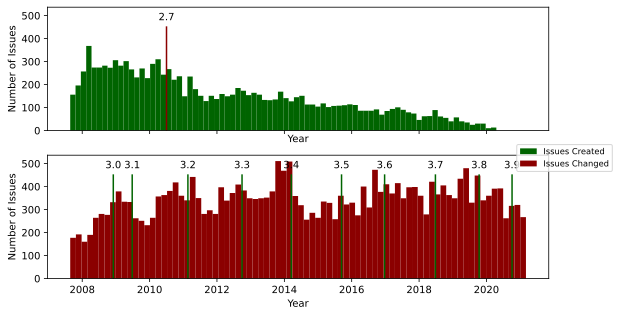

In [92]:
def plot_line(ax, date: str, text: str, **kwargs):
    ax.plot(pd.to_datetime([date, date]), [0, 450], **kwargs)
    ax.text(pd.to_datetime(date), 480, text, ha="center")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,5), sharex=True, sharey=True)
for i in ax:
    i.set_xlabel("Year")
    i.set_ylabel("Number of Issues")
ax[0].hist(list(filter(lambda _: not pd.isna(_), py_2['created'])), color="darkgreen", bins=80, label="Issues Created")
plot_line(ax[0], "2010-07-03", "2.7", color="darkred")
ax[1].hist(list(filter(lambda _: not pd.isna(_), py_3['created'])), color="darkred", bins=80, label="Issues Changed")
plot_line(ax[1], "2008-12-03", "3.0", color="darkgreen")
plot_line(ax[1], "2009-06-26", "3.1", color="darkgreen")
plot_line(ax[1], "2011-02-20", "3.2", color="darkgreen")
plot_line(ax[1], "2012-09-29", "3.3", color="darkgreen")
plot_line(ax[1], "2014-03-17", "3.4", color="darkgreen")
plot_line(ax[1], "2015-09-13", "3.5", color="darkgreen")
plot_line(ax[1], "2016-12-23", "3.6", color="darkgreen")
plot_line(ax[1], "2018-06-27", "3.7", color="darkgreen")
plot_line(ax[1], "2019-10-14", "3.8", color="darkgreen")
plot_line(ax[1], "2020-10-05", "3.9", color="darkgreen")
fig.legend(loc=5, fontsize="small")
fig.show()